# 연속형 확률변수

In [200]:
from IPython.display import Image #주피터 노트북에 이미지 삽입

In [201]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [202]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 1차원 연속형 확률변수         
- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는 확률을 정의
- [예] 룰렛
    * 원형인 룰렛의 둘레 길이는 1이고, 룰렛의 출발점부터 룰렛을 돌려 멈춘 위치까지 측정한 호의 길이를 실현값으로 함   
    * 즉, 이 룰렛이 취할 수 있는 값이 0부터 1사이의 실수
    * 큰 수일수록 나오기 쉬워지는 불공정한 구조
    * 0.5라는 값을 취할 확률은 0
    * 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0

### 1차원 연속형 확률변수의 정의

확률밀도함수
- 확률변수가 취할 수 있는 값은 구간 [a, b]
- 확률은 확률밀도함수(PDF) 또는 밀도함수 f(x)에 의해 정의
- 어떤 특정 값을 취하는 확률로는 정의되지 않음
- 관련수식 (아래에)
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념을 파악하기

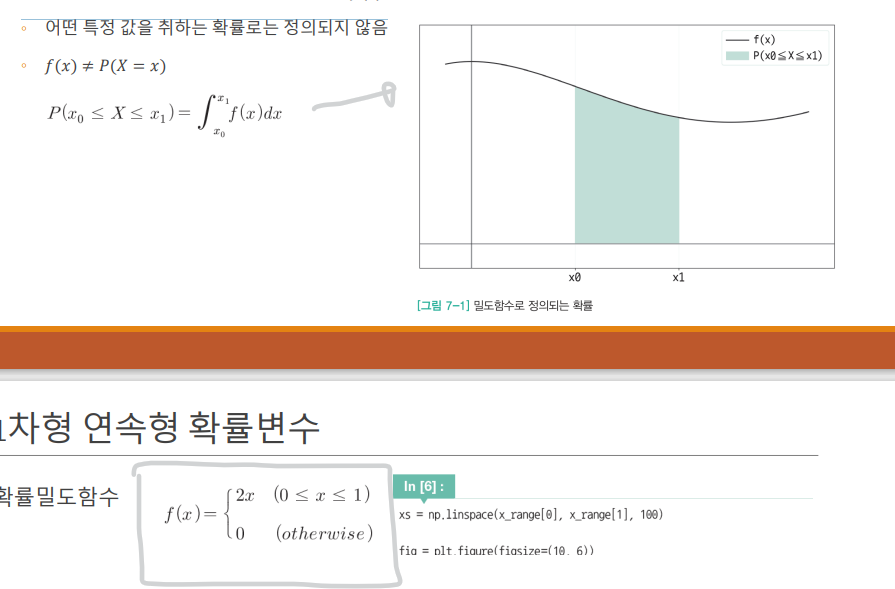

In [203]:
Image('capture_img/ch07_01.png')

In [204]:
# 불공정한 룰렛을 예로 들어 파이썬으로 구현해보자

# 취할 수 있는 값의 구간에 대해 하한과 상한을 x_range로 정의한다
x_range = np.array([0, 1])

In [205]:
# x_range를 정의역으로 하는 밀도함수를 구현해보자
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
        #이는 결국 y = 2x의 수식과 같음 (해당 구간의 면적을 구하면 1이 된다)
    else:
        return 0

In [206]:
X = [x_range, f]
# x_range와 f의 세트가 확률분포이다. 이 확률분포에 의해 확률변수 X의 움직임이 결정된다.

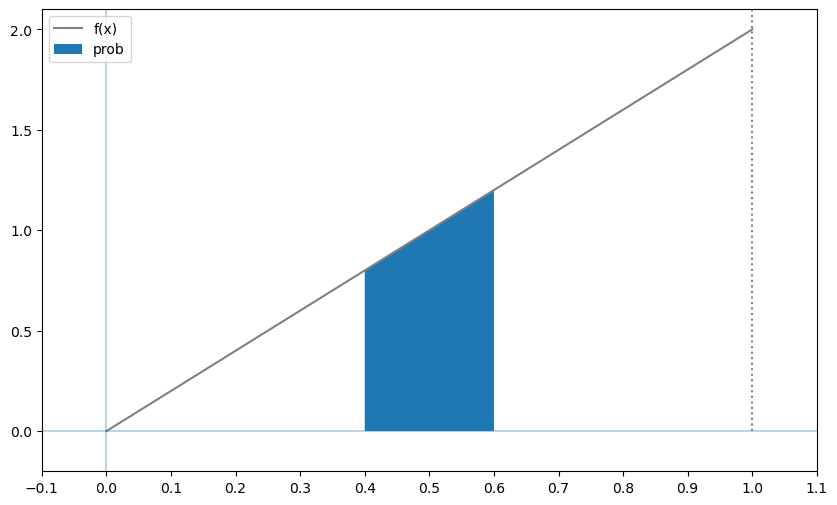

In [207]:
# 밀도함수 f(x)를 그려보자

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

# 그려진 영역에서 0.4~0.6 범위의 면적은 불공정한 룰렛이 0.4 ~ 0.6 사이의 값을 취할 확률이다.

In [208]:
# 적분을 활용하여 위 그래프의 면적을 구해보자 => integrate의 quad 함수를 사용한다
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)
# 첫번쨰 반환값이 적분값이다. 확률이 0.2임을 알 수 있다.

(0.200, 0.000)

확률의 성질 
- 연속형 확률변수에서는 확률의 성질로 다음 두 식을 만족해야함
    * f(x) >= 0
    * f(x)를 - 무한에서 + 무한까지 적분한 값은 1이어야 함

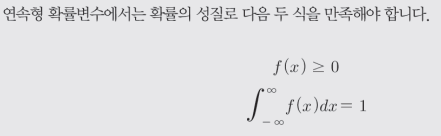

In [209]:
Image('capture_img/ch07_02.png')

In [210]:
# 첫번쨰 조건이 맞는지 확인해보자 (f(x) >= 0)

from scipy.optimize import minimize_scalar
# minimize_scalar는 함수의 최솟값을 구하는 함수
# 이 함수를 사용해서 f(x)의 최솟값이 0 이상으로 나오면 f(x)가 항상 0 이상의 값을 취함을 의미
res = minimize_scalar(f)
res.fun

0

In [211]:
# 두번째 조건이 맞는지 확인해보자 (f(x)를 - 무한에서 + 무한까지 적분한 값은 1이어야 함)

# 넘파이에서는 무한대 표현하기 => np.inf
integrate.quad(f, -np.inf, np.inf)[0]

# 결과가 1을 나온것을 보니 두번쨰 성질도 만족하고 있음을 하기 위함이다. 
# 그래서 y = 2 * x 로 설정한것이다. (총 면적이 1로 되게끔 하기 위해서)

1.000

누적분포함수
- 확률변수 X가 x 이하가 될 떄의 확률을 반환하는 함수 => F(x)로 표기
- 아래의 사진과 같이 정의함

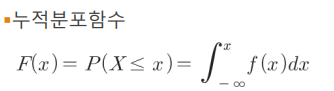

In [212]:
Image('capture_img/ch07_03.png')

In [213]:
# 분포함수를 정의한 대로 구현해보자
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [214]:
# 룰렛이 0.4~0.6사의 값을 취할 확률 계산해보자
F(0.6) - F(0.4)

0.200

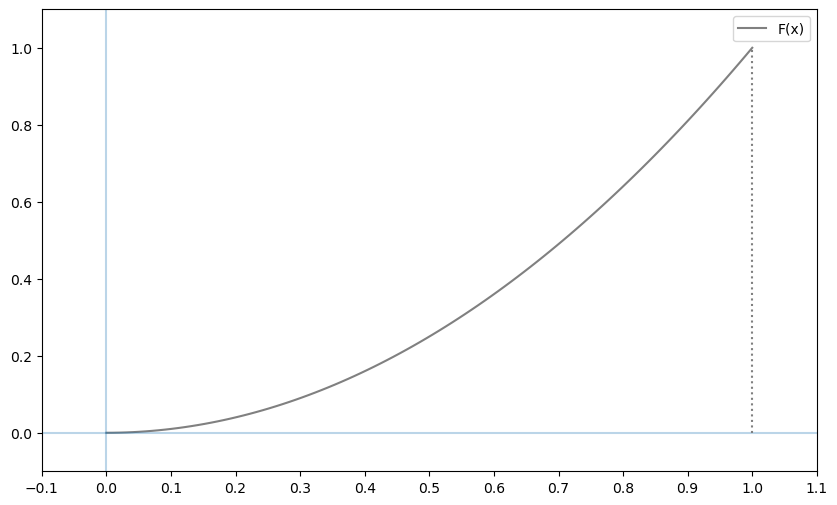

In [215]:
#분포함수 F(x)를 그려보자

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

# 그래프를 그려본 결과 분포함수는 단조증가함수가 된다
# (x가 증가할때 y는 감소하지 않는 함수)

확률변수의 변환
- X가 연속형 확률변수
- Y = 2X + 3 인 Y도 연속형 확률변수
- Y의 밀도함수를 g(y)라고 하면 아래 사진과 같다.
- 분포함수를 G(y)라고 하면 아래 사진과 같다.

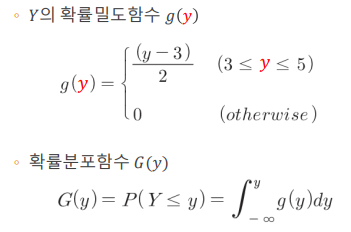

In [216]:
Image('capture_img/ch07_04.png')

In [217]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

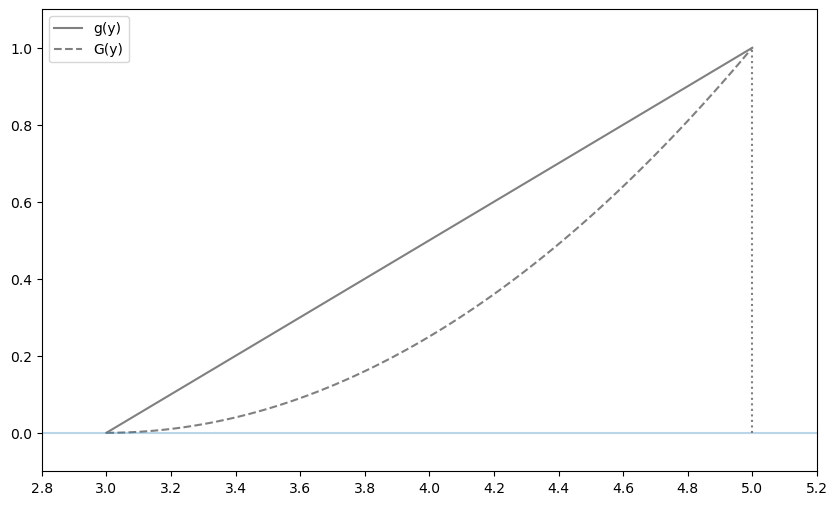

In [218]:
# 밀도함수 g(y)와 분포함수 G(y)를 동시에 그려보자 

ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()


# 정의역은 다르지만 확률변수 X의 밀도함수와 분포함수가 유사한 형태가 되었다.

### 1차원 연속형 확률분포의 지표

#### 평균
- 연속형 확률변수 X의 평균을 다음 식으로 정의됨
- 이것을 확률변수 X의 기댓값이라고도 부름

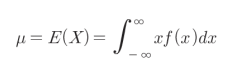

In [219]:
Image("capture_img/ch07_05.png")

In [220]:
# 불공정한 룰렛의 기댓값
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

- 더 일반화화여 확률변수 X의 변환 g(X)의 기댓값을 아래와 같이 정의가능

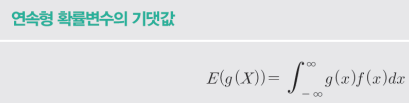

In [221]:
Image("capture_img/ch07_06.png")

In [222]:
# 위 수식의 기댓값을 함수로 구현해보자

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [223]:
# g에 아무것도 지정하지 않으면 X의 기댓값이 구해짐
E(X)

0.667

In [224]:
# 확률변수 Y = 2X + 3의 기댓값을 계산해보자
E(X, g=lambda x: 2*x+3)

4.333

In [225]:
# 기댓값의 선형성이 성립함을 확인할 수 있다.
2 * E(X) + 3

4.333

#### 분산
- 연속형 확률변수 X의 분산은 다음식으로 정의된다.
    여기서 감마는 확률변수 X의 기댓값 E(X)이다.

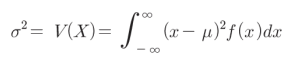

In [226]:
Image('capture_img/ch07_07.png')

In [227]:
# 불공정한 룰렛의 분산을 구해보자
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [228]:
# Y = 2X + 3 으로 변환한 확률변수의 분산을 구해보자
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [229]:
# g를 지정하지 않으면, 확률변수 X의 분산을 계산한다.
V(X)

0.056

In [230]:
# 확률변수 Y = 2X + 3의 분산을 계산한다.
V(X, lambda x: 2*x + 3)

0.222

In [231]:
# 연속형 확률변수에서도 5장에서 설명한 분산의 공식이 성립한다.
# V(2X+3) = 2 ** 2 V(X) 가 성립합을 확인할 수 있다.
2**2 * V(X)

0.222

## 2차원 연속형 확률분포   
- 구체적인 예로 2개의 불공정한 룰렛을 사용해본다고 가정하자

### ２차원 연속형 확률변수의 정의   
결합확률밀도함수

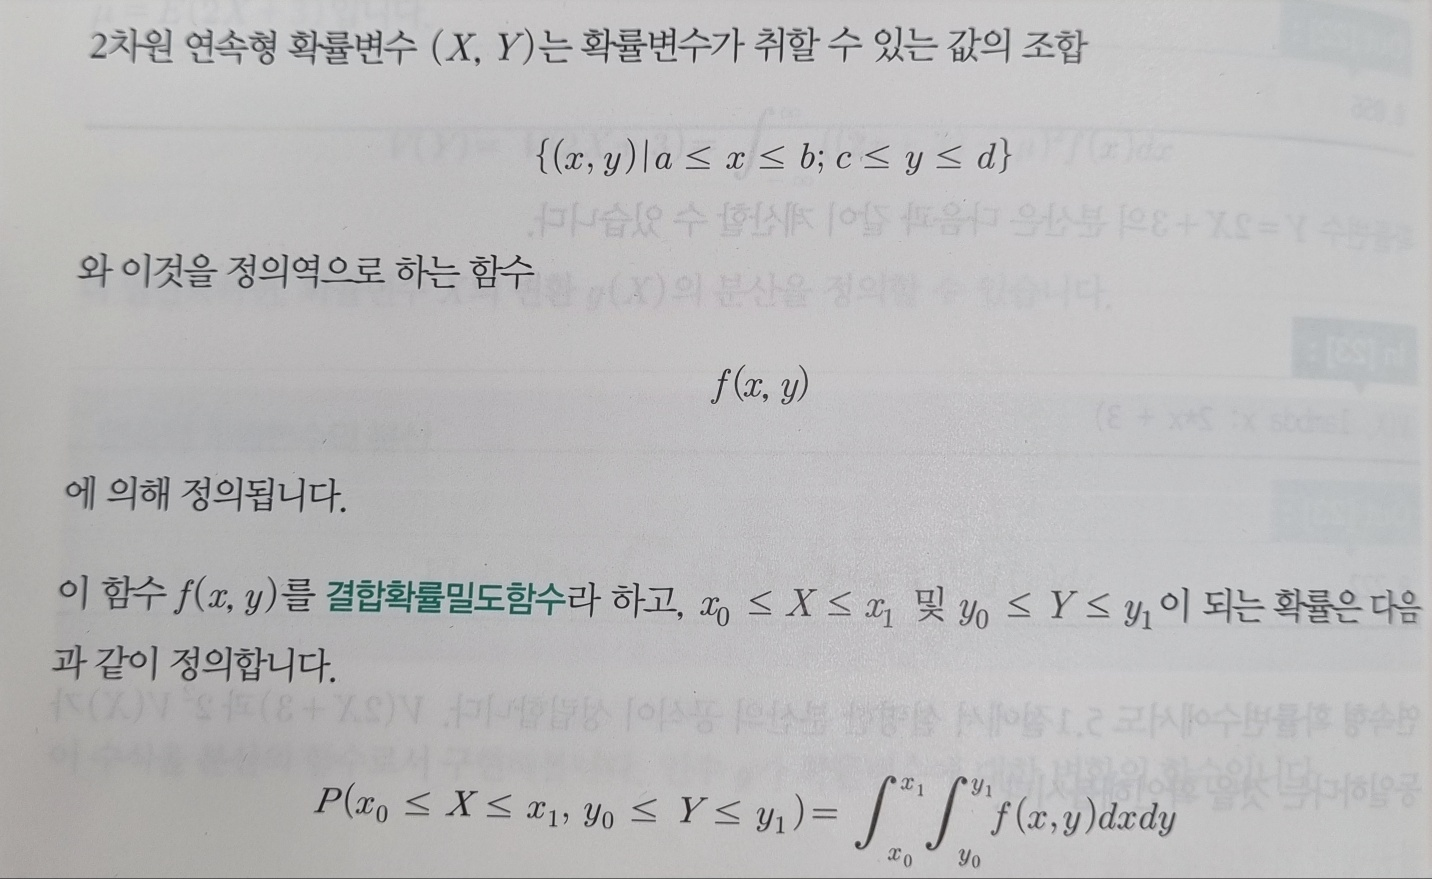

In [232]:
Image('capture_img/ch07_08.jpg')

예: 불공정한 룰렛 A, B
- A와 B를 더한 것이 X, A를 Y ==> 이렇게 설정한 2차원 확률변수 (X, Y)
- 이 확률변수 (X,Y)가 취할 수 있는 값 ==>  {0 <= X <= 2, 0 <= Y <= 1}
- 이 확률변수 (X,Y)의 결합확률밀도함수는 아래와 같다.
    * 좀 더 덧붙여 설명해보자면,,
      A + B = X, A = Y 로 설정했으니 B = X - Y이다.
      즉 4y(x-y)는 2A * 2B 와 같다

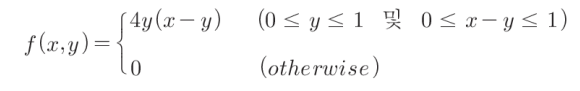

In [233]:
Image('capture_img/ch07_09.png')

In [234]:
# 위의 내용을 파이썬으로 구현해보자
# X와 Y가 취할 수 있는 값을 각각 x_range와 y_range로 정의하자
x_range = [0, 2]
y_range = [0, 1]

In [235]:
# 결합밀도함수를 다음과 같이 정의하자
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [236]:
# 확률변수 (X,Y)의 움직임은 x_range, y_range, f_xy에 의해 정의되므로 이를 리스트에 담아보자
XY = [x_range, y_range, f_xy]
# 이것으로 2차원 확률변수 (X,Y)로 구현완료!

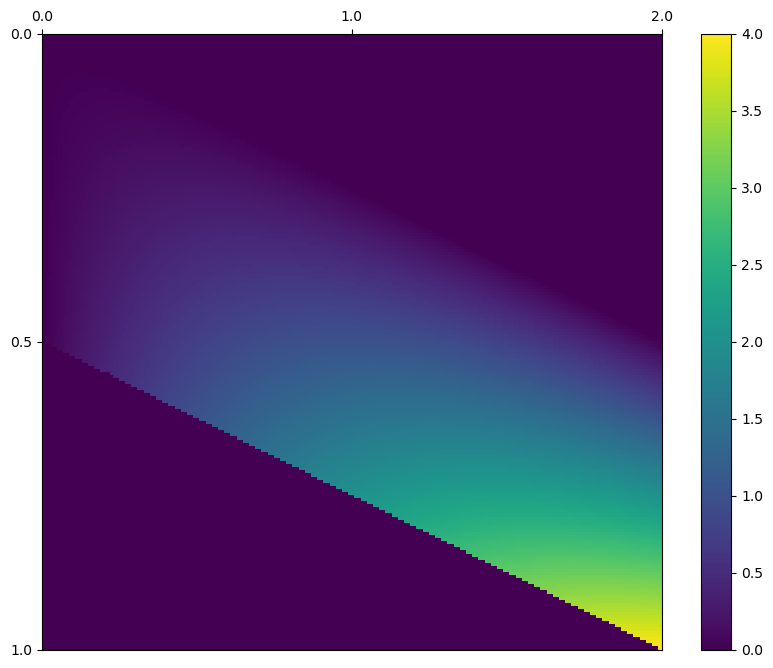

In [237]:
# 결합확률밀도함수를 히트맵으로 그려보자

xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [238]:
# 적분결과가 1이 되는지 확인해보자
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.000

주변확률밀도함수
- 확률변수 X만의 움직임, 즉 확률변수 X의 밀도함수를 알고싶을 떄
- 이때 확률변수 X의 밀도함수를 fx(x)라고 하면 아래가 성립된다.

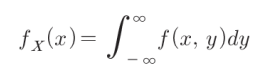

In [239]:
Image('capture_img/ch07_10.png')

- 이와 같이 해서 구한 fx(x)를 X의 주변확률밀도함수라하고, 간단히 주변밀도함수라고도 한다

In [240]:
# 위의 내용을 파이썬으로 구현해보자

# functools의 partial 함수 
# - 인수의 일부를 고정한 새로운 함수를 만들 수 있는 함수
# - partial(f_xy,x)라고 하면 함수 f_xy의 인수 x, y 중 x가 고정되고, 인수가 y만으로 된 함수가 반환됨

from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [241]:
X = [x_range, f_X]
Y = [y_range, f_Y]

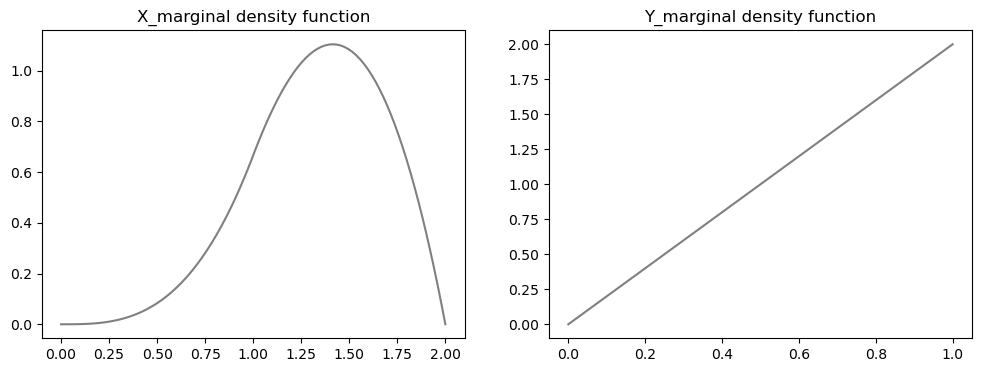

In [242]:
# X, Y를 각각 독립적으로 고려한 밀도함수를 그려보자

xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### ２차원 연속형 확률변수의 지표

#### 기댓값    
- 1차원 연속형 확률변수의 경우와 거의 동일
- X의 기댓값이라면 x와 밀도함수의 곱을 x와 y로 적분하여 구할 수 있다.

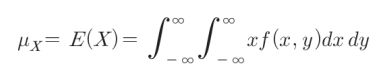

In [243]:
Image('capture_img/ch07_11.png')

In [244]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.333

In [245]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [246]:
# X의 기댓값
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [247]:
# Y의 기댓값
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

기댓값의 선형성
- E(2X + 3Y) = 2 E(X) + 3 E(Y)

In [248]:
a, b = 2, 3

In [249]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [250]:
a * mean_X + b * mean_Y

4.667

#### 분산

In [251]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.111

In [252]:
# g(X, Y)의 분산

def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [253]:
# X의 분산
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [254]:
# Y의 분산
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [255]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [256]:
cov_xy = Cov(XY)
cov_xy

0.056

분산과 공분산
- a, b를 실수, X, Y를 확률변수로 했을 때
    V(aX + bY) = a ** 2 V(X) + b ** 2 V(Y) + 2ab Cov(X, Y)
    가 성립함

In [ ]:
V(XY, lambda x, y: a*x + b*y)

In [ ]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

상관계수

In [ ]:
cov_xy / np.sqrt(var_X * var_Y)